In [55]:
import warnings
warnings.filterwarnings("ignore")

Logistic regression

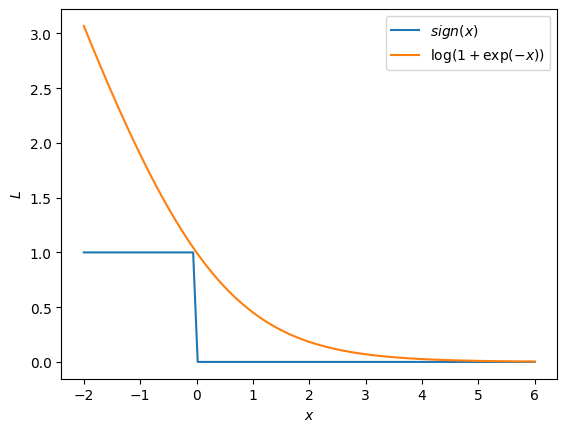

In [78]:
def sign(x):
    return np.array(x <= 0, dtype=np.int64)
def upper_bound(x):
    return np.log2(1+np.exp(-x))

x = np.linspace(-2, 6, 100)
plt.plot(x, sign(x), label='$sign(x)$')
plt.plot(x, upper_bound(x), label='$\log(1+\exp(-x))$')

plt.xlabel('$x$')
plt.ylabel('$L$')
plt.legend(loc='best')
plt.show()

In [2]:
import numpy as np
from scipy.optimize import minimize
minimize(np.square, 0).x # выход array([0.])
minimize(np.square, 2).x # если подберем начальное приближение 2, то х равен примерно 0

array([-1.88846401e-08])

In [4]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1
y = np.dot(X, np.array([1, 2]))

In [6]:
# реализация линейной регрессии
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1
y = np.dot(X, np.array([1, 2]))

def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s
w_fit = minimize(my_loss, [0, 0]).x
print(w_fit)

from sklearn.linear_model import LinearRegression
# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[1.00000005 1.99999998]
[1. 2.]


In [71]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [35]:
# реализация логистической регрссии
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

X = X[:98]
y = y[:98]

def my_loss(w): # тут лог-лосс
    s = 0
    for i in range(X.shape[0]):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

w_fit = minimize(my_loss, [-2, -5, 5, 5]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 0.5622907  -3.81367896  4.84060543  4.84025672]
[[-2.31629632 -6.55454939 10.45133716  4.63112372]]


In [ ]:
from sklearn.linear_model import SGDClassifier
logreg = SGDClassifier(loss='log_loss') #переключение между моделями
linsvm = SGDClassifier(loss='hinge')

linear_classifier = SGDClassifier(random_state=0)

parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
             'loss':['hinge', 'log_loss']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Реализация руками но круче

In [79]:
import torch
torch.manual_seed(0)

l = 1000
n = 2

X = torch.randn([l, n])
w_true = torch.randn([n])
Y = torch.ones([l])
Y[X@w_true < 0] = -1

In [82]:
print(Y[:10], X[:10])

tensor([-1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.]) tensor([[-1.1258, -1.1524],
        [-0.2506, -0.4339],
        [ 0.8487,  0.6920],
        [-0.3160, -2.1152],
        [ 0.3223, -1.2633],
        [ 0.3500,  0.3081],
        [ 0.1198,  1.2377],
        [ 1.1168, -0.2473],
        [-1.3527, -1.6959],
        [ 0.5667,  0.7935]])


In [83]:
torch.manual_seed(0)
np.random.seed(0)
w = torch.randn([n], requires_grad=True)

K = l
list_of_loss_sqrt = []
for k in range(1, K+1):
    # Считаем ошибку L на k-м шаге
    with torch.no_grad():
        list_of_loss_sqrt.append(
            torch.mean(torch.log2(1+torch.exp(-Y*(X@w)))))

    # выбираем случайный элемент из выбооки
    ind = np.random.randint(low=0, high=l)
    alpha = 1/np.sqrt(k)

    # считаем ошибку на элементе
    q = torch.log2(1+torch.exp(-Y[ind]*(X[ind]@w)))

    # считаем g с крышкой
    q.backward()

    # делаем градиентный шаг
    with torch.no_grad():
        w.add_(w.grad, alpha=-1*alpha)

    # обнуляем градиент
    w.grad.zero_()

In [84]:
pred = torch.ones([l])
pred[X@w < 0] = -1
print('Точность прогноза: {}'.format(torch.mean((pred == Y).float()).item()))

Точность прогноза: 0.9980000257492065


In [85]:
torch.manual_seed(0)
np.random.seed(0)
w = torch.randn([n], requires_grad=True)

K = l
list_of_loss = []
for k in range(1, K+1):
    # Считаем ошибку L на k-м шаге
    with torch.no_grad():
        list_of_loss.append(torch.mean(torch.log2(1+torch.exp(-Y*(X@w)))))

    # выбираем случайный элемент из выбооки
    ind = np.random.randint(low=0, high=l)
    alpha = 1/k

    # считаем ошибку на элементе
    q = torch.log2(1+torch.exp(-Y[ind]*(X[ind]@w)))

    # считаем g с крышкой
    q.backward()

    # делаем градиентный шаг
    with torch.no_grad():
        w.add_(w.grad, alpha=-1*alpha)

    # обнуляем градиент
    w.grad.zero_()

In [86]:
torch.manual_seed(0)
w = torch.randn([n], requires_grad=True)

dataset = torch.utils.data.TensorDataset(X, Y)
generator = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

optimizer = torch.optim.SGD([w], lr=1)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                              lambda k: 1/np.sqrt(k+1))

list_of_loss_torch = []
for x, y in generator:
    optimizer.zero_grad()

    # Считаем ошибку L на k-м шаге
    with torch.no_grad():
        list_of_loss_torch.append(
            torch.mean(torch.log2(1+torch.exp(-Y*(X@w)))))

    q = torch.log2(1+torch.exp(-y*(x@w))).mean()

    q.backward()

    optimizer.step()
    scheduler.step()

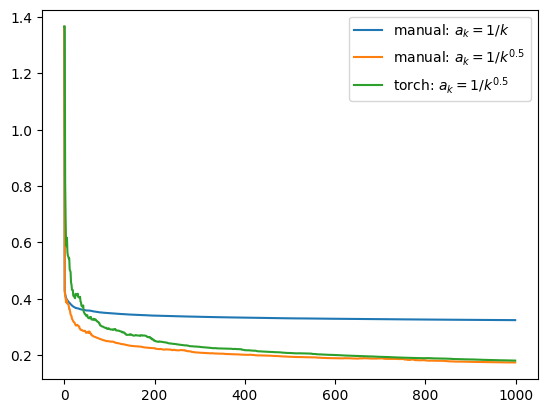

In [91]:
plt.plot(list_of_loss, label="manual: $a_k = 1/k$")
plt.plot(list_of_loss_sqrt, label="manual: $a_k = 1/k^{0.5}$")
plt.plot(list_of_loss_torch, label="torch: $a_k = 1/k^{0.5}$")
plt.legend(loc='best')
plt.show()

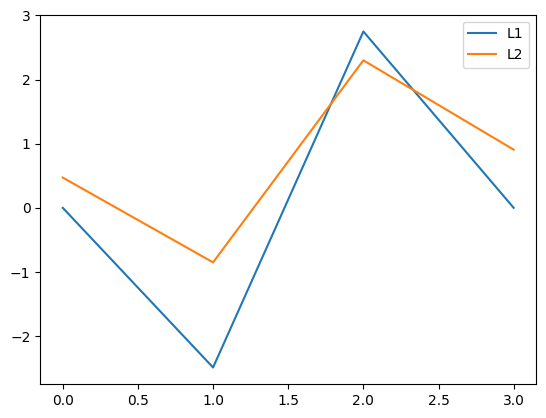

In [41]:
lr_weak_reg = LogisticRegression(C=100) # С -обратный коэффициент
lr_strong_reg = LogisticRegression(C=0.01)
LogisticRegression(solver='liblinear', penalty='l1')
LogisticRegression() # penalty='l2' by default

lr_L1 = LogisticRegression(solver='liblinear', penalty='l1').fit(X, y)
lr_L2 = LogisticRegression().fit(X, y)
plt.plot(lr_L1.coef_.flatten(), label = 'L1')
plt.plot(lr_L2.coef_.flatten(), label = 'L2')
plt.legend()

Многоклассовая классификация: one-vs-rest и softmax

In [48]:
X, y = load_iris(return_X_y=True)
lr0 = LogisticRegression()
lr1 = LogisticRegression()
lr2 = LogisticRegression()

lr0.fit(X, y==0)
lr1.fit(X, y==1)
lr2.fit(X, y==2)
print(lr0.decision_function(X)[:2], lr1.decision_function(X)[:2], lr2.decision_function(X)[:2]) # берем с наибольшим выходом

[4.12316458 3.76217112] [-2.05814819 -0.95795886] [-13.65294999 -13.31738981]


In [51]:
lr_ovr = LogisticRegression(multi_class='ovr') #один против всех
lr_ovr.fit(X,y)
print(lr_ovr.coef_.shape, lr_ovr.intercept_.shape)

(3, 4) (3,)


In [56]:
lr_mn = LogisticRegression(multi_class="multinomial") #softmax
lr_mn.fit(X,y)
print(lr_mn.coef_.shape, lr_mn.intercept_.shape)

(3, 4) (3,)


In [73]:
# еще раз один против всех
np.random.seed(0)
l = 100
n = 2
X1 = np.array([[-1,-1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1]]) + 0.5*np.random.randn(l, n)
X3 = np.array([[-1,1]]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2, X3])
y = np.hstack([[0]*l, [1]*l, [2]*l])

# Добавляем константу
X = np.hstack([X, np.ones([len(X), 1])])

In [74]:
# обучения моделей
models = []
model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==1, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==2, dtype=np.int64))
models.append(model)

In [75]:
def get_line(a, b, c=0, x_min=-10, x_max=10):
    x1, y1 = -(-b + c)/a, -1
    x2, y2 = -(b + c)/a, 1

    polynomial = np.poly1d(np.polyfit([x1, x2], [y1, y2], 1))
    x_axis = np.linspace(x_min, x_max)
    y_axis = polynomial(x_axis)

    return x_axis, y_axis

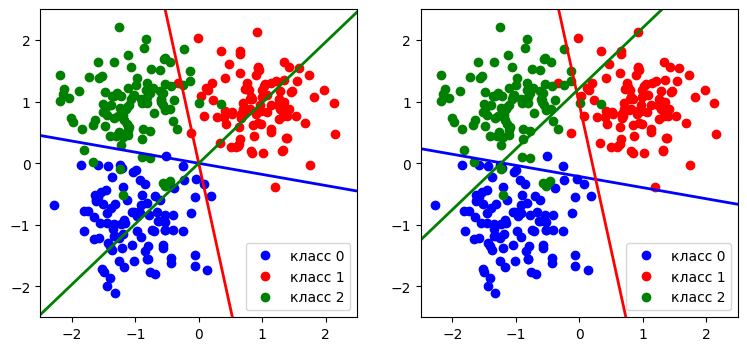

In [76]:
cols = ['blue', 'red', 'green']
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].set_xlim((-2.5, 2.5)), ax[i].set_ylim((-2.5, 2.5))

for k in np.unique(y):
    ax[0].plot(X[y==k,0], X[y==k,1], 'o',
               label='класс {}'.format(k), color=cols[k])
    ax[1].plot(X[y==k,0], X[y==k,1], 'o',
               label='класс {}'.format(k), color=cols[k])

for k in np.unique(y):
    ax[0].plot(*get_line(*models[k].coef_[0][:2]), linewidth=2, color=cols[k])
    ax[1].plot(*get_line(*models[k].coef_[0]), linewidth=2, color=cols[k])

ax[0].legend(loc='best'), ax[1].legend(loc='best')
plt.show()

In [77]:
scores = np.zeros([3,3])
for k in range(3):
    pred = np.argmax(np.vstack([models[i].predict_proba(X[y==k])[:, 1] for i in range(3)]).T, axis=1)
    for i in range(3):
        scores[i, k] = sum(pred == i)
print(scores)

[[97.  0.  6.]
 [ 0. 98.  2.]
 [ 3.  2. 92.]]


SVM

In [98]:
# посмотри пример с SVM Feature и SVM регрессию
from sklearn.svm import SVC
svm = SVC(gamma=1) #по дефолту ядро = "rbf", gamma=0.01 граница выполаживается, gamma=2 вообще каждую точку

In [93]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
m = 150
n = 2
X = 10*np.random.randn(m, n)
Y = np.array((X[:,0]**2+X[:,1]**2+50*np.random.randn(m))<100, dtype=np.int64)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=50, random_state=0)

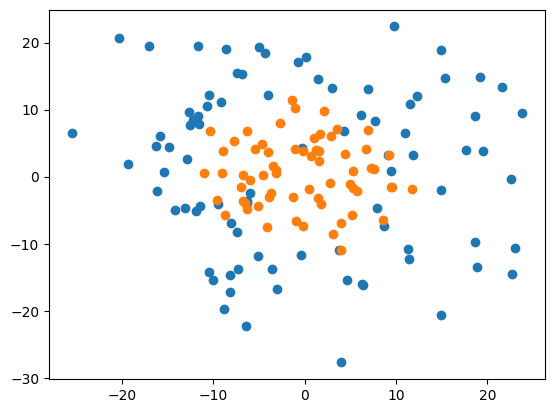

In [94]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
plt.show()

In [99]:
model = SVC(kernel='poly')
_ = model.fit(X_train, Y_train)

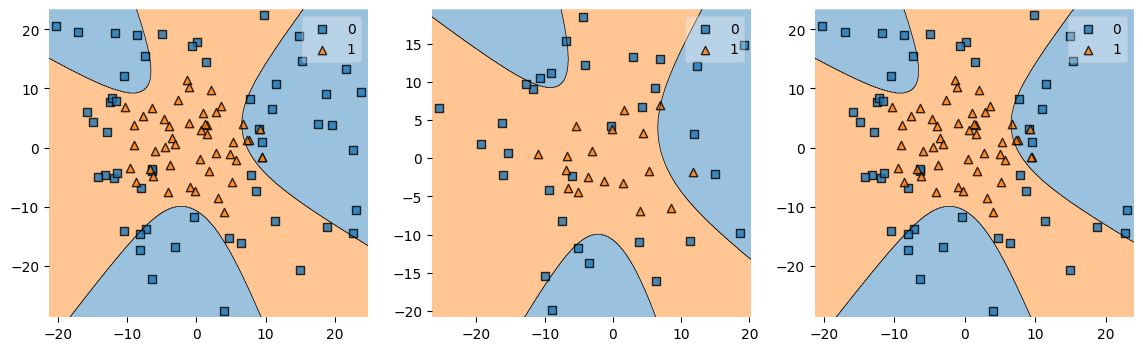

In [100]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)
from mlxtend.plotting import plot_decision_regions
ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])
plt.show()